In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [2]:
import torch

# Train dataset

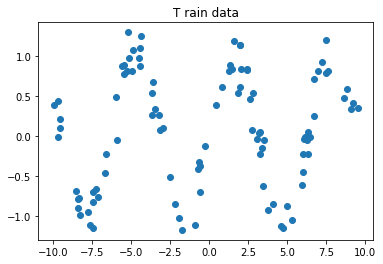

In [3]:
X_train = torch.rand(100)
X_train = X_train * 20.0 - 10.0


y_train = torch.sin(X_train)
noise = torch.randn(y_train.shape) / 5
y_train = y_train + noise

plt.plot(X_train.numpy(), y_train.numpy(), 'o');
plt.title('T rain data');

X_train.unsqueeze_(1)
y_train.unsqueeze_(1);

Данные, подаваеммые в нейросеть должны быть правильной размерности, то есть тензером размерности кол-во объектов на кол-во признаков. 

В этом помогает метод `unsqueeze_` (изменяет объект на месте). 

# Validation dataset

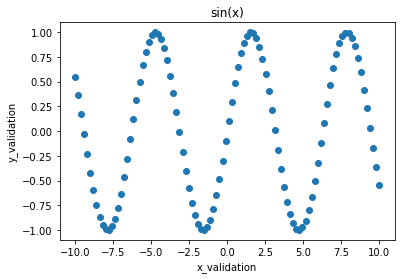

In [4]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation')

x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model construction

In [5]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x
    
sine_net = SineNet(50)

        

# Prediction

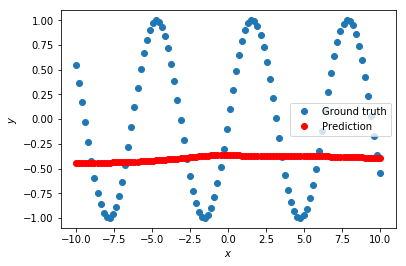

In [6]:
def predict(net, x, y):

    y_pred = net.forward(x)
    
    plt.plot(x.numpy(), 
             y.numpy(), 'o', label='Ground truth')
    plt.plot(x.numpy(),
             y_pred.data.numpy(), 'o',
             c = 'r', label='Prediction');
    plt.legend(loc='best')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    


predict(sine_net, x_validation, y_validation)

# Optimizer

на вход подаются веса .parameters()

In [7]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

# Loss function

In [8]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

# Training procedure

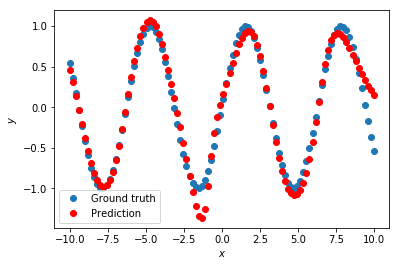

In [9]:
for epoch_index in range(2000):
    optimizer.zero_grad()
    
    y_pred = sine_net.forward(X_train)
    loss_val = loss(y_pred, y_train)
    
    loss_val.backward()
    
    optimizer.step()
    
predict(sine_net, x_validation, y_validation)